# TAREFA REGRESSAO LINEAR COM UMA E MULTIPLAS VARIAVEIS

<ul>
    <li>Diego Santos Gonçalves - 20183012537</li>
    <li>Mariana Bulgarelli Alves dos Santos - 20183000330</li>
</ul>
    
Para executar este notebook, é necessária a instalação das seguintes bibliotecas:
<ul>
    <li>numpy </li>
    <li>random </li>
    <li>matplotlib - para criação dos gráficos </li>
</ul>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

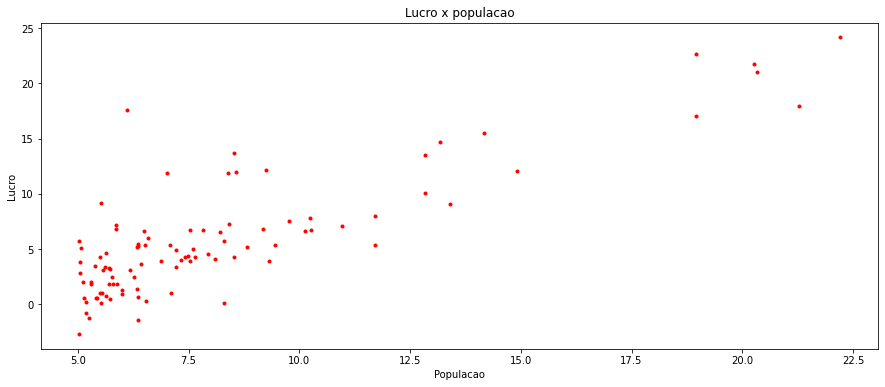

In [24]:
# Regressão linear com uma variável
# prever o lucro com um food truck

# read file
data = pd.read_csv('data1.txt', sep=",", header=None)
data.columns = ["Tamanho_Populacao", "Lucro"]

# plota grafico
plt.title(f"Lucro x populacao") 
plt.xlabel("Populacao") 
plt.ylabel("Lucro")
x = data['Tamanho_Populacao']
y = data['Lucro']
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'r.')
plt.show()

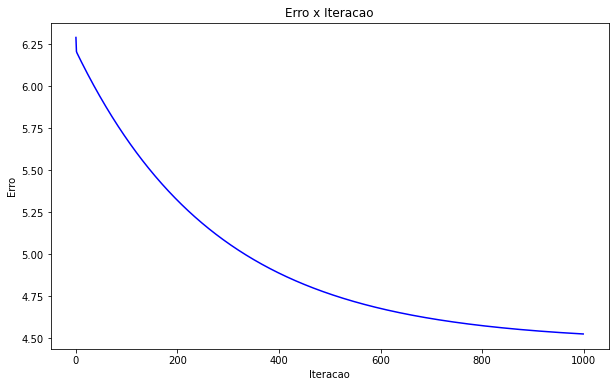

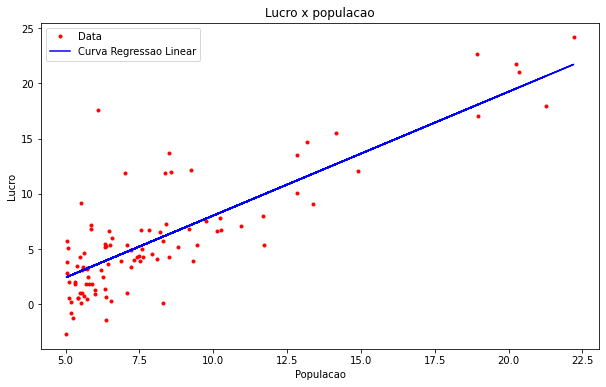

In [33]:
# calcular os parâmetros da regressão linear

# função custo em relação ao número de iterações
n_iteracoes = 1000
tx_aprendizado = 0.01
coef_angular = 1
coef_linear = 0.5

derivada_erro_angular = 0
derivada_erro_linear = 0

array_erro = []
array_reg = []

for i in range(n_iteracoes):
    soma = 0
    for i, row in data.iterrows():
        soma += (coef_angular*row['Tamanho_Populacao'] + coef_linear - row['Lucro'])

    derivada_erro_linear = soma/len(data)

    soma = 0
    for i, row in data.iterrows():
        soma += (coef_angular*row['Tamanho_Populacao'] + coef_linear - row['Lucro'])*row['Tamanho_Populacao']

    derivada_erro_angular = soma/len(data)

    coef_angular = coef_angular - (tx_aprendizado*derivada_erro_angular)
    coef_linear = coef_linear - (tx_aprendizado*derivada_erro_linear)

    soma = 0
    for i, row in data.iterrows():
        soma += (coef_angular*row['Tamanho_Populacao'] + coef_linear - row['Lucro'])**2

    funcao_custo = soma/(2*len(data))
    array_erro.append(funcao_custo)

for i, row in data.iterrows():
    array_reg.append(coef_angular*row['Tamanho_Populacao'] + coef_linear)

# plota grafico erro x iteracao
plt.title(f"Erro x Iteracao") 
plt.xlabel("Iteracao") 
plt.ylabel("Erro")
x = list(range(0, n_iteracoes))
y = array_erro
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'b')
plt.show()

plt.title(f"Lucro x populacao") 
plt.xlabel("Populacao") 
plt.ylabel("Lucro")
x = data['Tamanho_Populacao']
y = data['Lucro']
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,y, 'r.')
plt.plot(x, array_reg, 'b')
plt.legend(["Data", "Curva Regressao Linear"])
plt.show()

In [42]:
# Regressão linear com múltiplas variáveis
# prever o preço de uma casa

# read file
data2 = pd.read_csv('data2.txt', sep=",", header=None)
data2.columns = ["Tamanho_casa", "Num_quartos", "Preco"]

# plota df
data2

,Tamanho_casa,Num_quartos,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [41]:
# Subtraia o valor médio de cada feature do conjunto de dados e divida os valores das features pelos desvios-padrão
valor_medio_tam = data2["Tamanho_casa"].describe()['mean']
print(valor_medio_tam)
valor_medio_quartos = data2["Num_quartos"].mean()
valor_medio_preco = data2["Preco"].mean()

valor_desvio_tam = data2["Tamanho_casa"].std()
print(valor_desvio_tam)
valor_desvio_quartos = data2["Num_quartos"].std()
valor_desvio_preco = data2["Preco"].std()

data2["Tamanho_casa"] = (data2["Tamanho_casa"] - valor_medio_tam) / valor_desvio_tam
data2["Num_quartos"] = (data2["Num_quartos"] - valor_medio_quartos) / valor_desvio_quartos
data2["Preco"] = (data2["Preco"] - valor_medio_preco)/valor_desvio_preco

print(data2)

NameError: name 'data2' is not defined